In [ ]:
#指导教师：宋陆军教师
#参考资料：基于python的金融分析与风险管理-斯文
#          风险管理与金融机构赫尔

In [1]:
##导入模块
import pandas as pd
import numpy as np

In [2]:
##导入数据
szzz = pd.read_excel('C:\\Users\\11525\\Desktop\\上证综指.xlsx')

In [3]:
##读取数据前5行
szzz.head()

,code,date,open,close,high,low,volume
0,1,1991-07-15,0.203,0.203,0.203,0.203,4.0
1,1,1991-07-19,0.199,0.199,0.199,0.199,1.0
2,1,1991-07-20,0.198,0.198,0.198,0.198,2.0
3,1,1991-07-24,0.195,0.195,0.195,0.195,2.0
4,1,1991-07-26,0.193,0.193,0.193,0.193,3.0


In [4]:
##读取数据后5行
szzz.tail()

,code,date,open,close,high,low,volume
7117,1,2021-05-28,24.68,24.50,24.71,24.16,492401.0
7118,1,2021-05-31,24.33,24.20,24.53,23.91,515351.0
7119,1,2021-06-01,24.20,23.92,24.25,23.50,625018.0
7120,1,2021-06-02,23.89,23.89,23.92,23.38,497527.0
7121,1,2021-06-03,23.72,23.77,24.14,23.68,400901.0


In [5]:
#截取数据
closeprice=szzz['close']

In [6]:
closeprice.head()

0    0.203
1    0.199
2    0.198
3    0.195
4    0.193
Name: close, dtype: float64

In [7]:
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']  
mpl.rcParams['axes.unicode_minus']=False   

<AxesSubplot:>

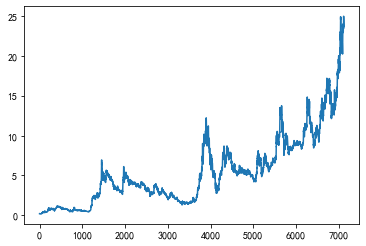

In [8]:
closeprice.plot()

In [9]:
##五日移动平均线
ma5 =closeprice.rolling(window=5).mean()

<AxesSubplot:>

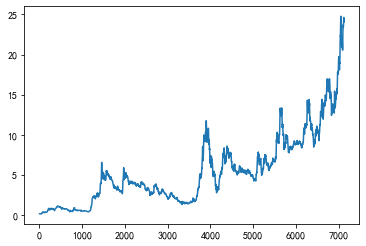

In [10]:
ma5.plot()

<AxesSubplot:>

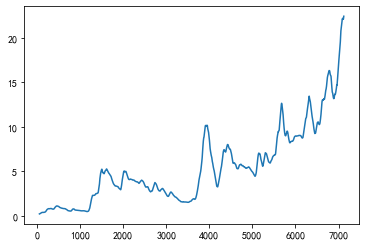

In [11]:
##60日MA
ma60 =closeprice.rolling(window=60).mean()
ma60.plot()

In [12]:
jc=closeprice-ma60

<AxesSubplot:>

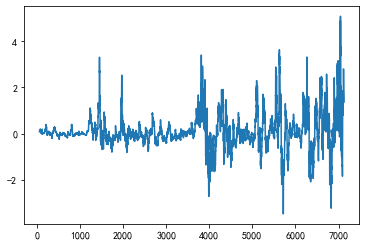

In [13]:
jc.plot()

In [14]:
std22=closeprice.rolling(window=22).std()

<AxesSubplot:>

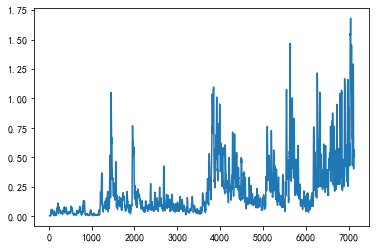

In [15]:
std22.plot()

In [16]:
std60=closeprice.rolling(window=60).std()

<AxesSubplot:>

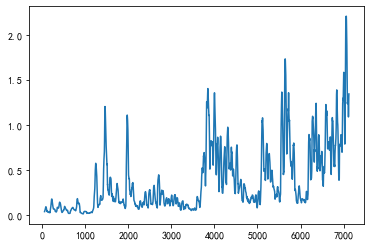

In [17]:
std60.plot()

In [18]:
szzz.describe() ##j简单描述

,code,open,close,high,low,volume
count,7122.0,7122.000000,7122.000000,7122.000000,7122.000000,7.122000e+03
mean,1.0,5.488213,5.493667,5.580332,5.406192,3.803831e+05
std,0.0,4.484428,4.491914,4.559343,4.414980,5.560885e+05
min,1.0,0.171000,0.171000,0.173000,0.168000,1.000000e+00
25%,1.0,2.168500,2.173500,2.216250,2.135000,3.429477e+04
50%,1.0,4.493500,4.492000,4.585000,4.420000,1.618280e+05
75%,1.0,7.844750,7.842500,7.999750,7.679750,5.056181e+05
max,1.0,24.910000,25.010000,25.310000,24.520000,5.086050e+06


In [19]:
openprice=szzz['open']

In [20]:
import matplotlib.pylab as plt

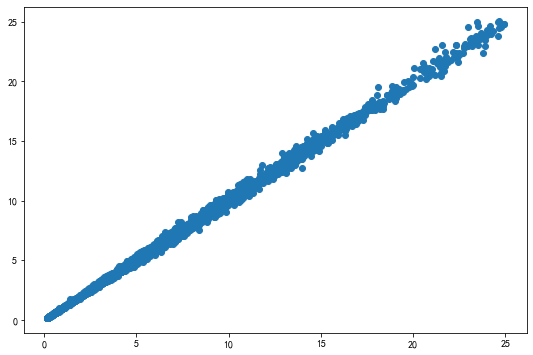

In [21]:
plt.figure(figsize=(9,6))
plt.scatter(x=openprice,y=closeprice) ##绘制散点图

In [22]:
import statsmodels.api as sm

In [23]:
model = sm.OLS(endog=closeprice,exog=openprice)

In [24]:
result =model.fit()

In [25]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  close   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.484e+07
Date:                Wed, 09 Jun 2021   Prob (F-statistic):                        0.00
Time:                        15:05:34   Log-Likelihood:                          3153.2
No. Observations:                7122   AIC:                                     -6304.
Df Residuals:                    7121   BIC:                                     -6297.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
open           1.0010      0.000   3852.136      0.000       1.001       1.002
==============================================================================
Omnibus:                     2214.133   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65581.546
Skew:                           0.875   Prob(JB):                         0.00
Kurtosis:                      17.763   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
beta = np.linspace(0.5,2.0,100)
Rf=0.03
Rm=0.12
Ri=Rf+beta*(Rm-Rf)

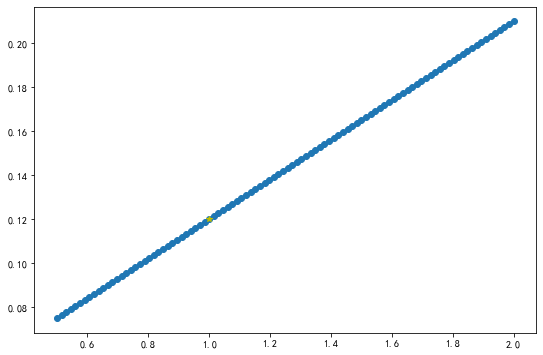

In [27]:
plt.figure(figsize=(9,6))
plt.scatter(beta,Ri)
plt.plot(1.0,Rf+1.0*(Rm-Rf),'y*',lw = 2.5)

In [28]:
stock_return =np.array([[0.0037,-0.0018,-0.00312,-0.023],[0.023,0.00189,0.00034,0.0017],[-0.0048,-0.0165,-0.0334,-0.029],[0.0061,-0.0037,0.0071,-0.0175]])

In [29]:
stock_return

array([[ 0.0037 , -0.0018 , -0.00312, -0.023  ],
       [ 0.023  ,  0.00189,  0.00034,  0.0017 ],
       [-0.0048 , -0.0165 , -0.0334 , -0.029  ],
       [ 0.0061 , -0.0037 ,  0.0071 , -0.0175 ]])

In [30]:
port_return=np.array([-0.0105,0.00706,-0.025,-0.00386])

In [31]:
port_return

array([-0.0105 ,  0.00706, -0.025  , -0.00386])

In [32]:
from scipy import linalg

In [33]:
weight =linalg.solve(a=stock_return,b=port_return)

In [34]:
weight   ##反求权重

array([ 0.27152929, -0.04086447,  0.33164583,  0.45841215])